<h1><center><font size=8>AIML - Project 6 - AllLife Bank Customer Segmentation</center></font></h1>
<center><img src="https://editor.analyticsvidhya.com/uploads/229741614091044056.jpg" width="400" height="300"></center>


### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


### Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


### Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

#### Data Dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Unsupervised Learning </span>

1. No dependent variable is present in the data


2. No scope of calculating accuracy, RMSE, or Recall or other relevant metrics


3. No need of Test, Control, & Validation

In [235]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

sns.set(color_codes=True)

import warnings

warnings.filterwarnings("ignore")

from yellowbrick.cluster import InterclusterDistance #----Visual representation of the cluster



## Reading Data Set

In [236]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
#Reading data from excel and copying in another dataframe
originalData = pd.read_excel("/content/drive/My Drive/Python Learning/Projects/Project6/Credit_Card_Customer_Data.xlsx")
data = originalData


## Data Overview 

In [238]:
# let's view the first 5 rows of the data
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [239]:
# let's view the first 5 rows of the data
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


### Data Analysis

In [240]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [241]:
print("Shape of the Data:", data.shape)

data.sample(n=10, random_state=1)

Shape of the Data: (660, 7)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


 -  Observations 
* There are 660 rows and 7 columns. 
* All the columns have 660 non-null values.
* All the data is in muric format.

In [242]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

# dropping the serial no. column as it does not provide any information
df.drop("Sl_No", axis=1, inplace=True)

df.head(3)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4


-   Statistical summary 

In [243]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


 - Check for duplicate values 

In [244]:
df.duplicated().sum()

0

In [245]:
df['Customer Key'].duplicated().sum()

5

#####  Observations 
- `Total_Credit_Cards` is varying from 1 years to 10 with 75% customer having 6 cards.. 
- `Total_visits_online` is more than `Total_visits_bank`. This means there are more online usage for bank than in person banking. 
- `Average Credit Limit` seems to be right skewed. Based on amx value there may be outlier.
- `Customer Key` has duplicate values for 5 customers. Which means there are 5 customers whose data is repeated in dataset. This may represent customer profile changes. We will retain this data for clusttering.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

**Common funtions to carry out the EDA.**

In [246]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [247]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
#pip uninstall sweetviz

In [ ]:
#!pip install sweetviz

### Univarient Data Analysis using sweetviz

In [248]:
numerical_cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

In [ ]:
#import sweetviz as sv

#analyze_report = sv.analyze(df, pairwise_analysis="on") #----df is the data frame, pairwise_analysis - correlation plots

 #analyze_report.show_html('Data EDA.html', open_browser=True)

#analyze_report.show_notebook(w=None,h=None, scale=0.8,layout='vertical',filepath=None)

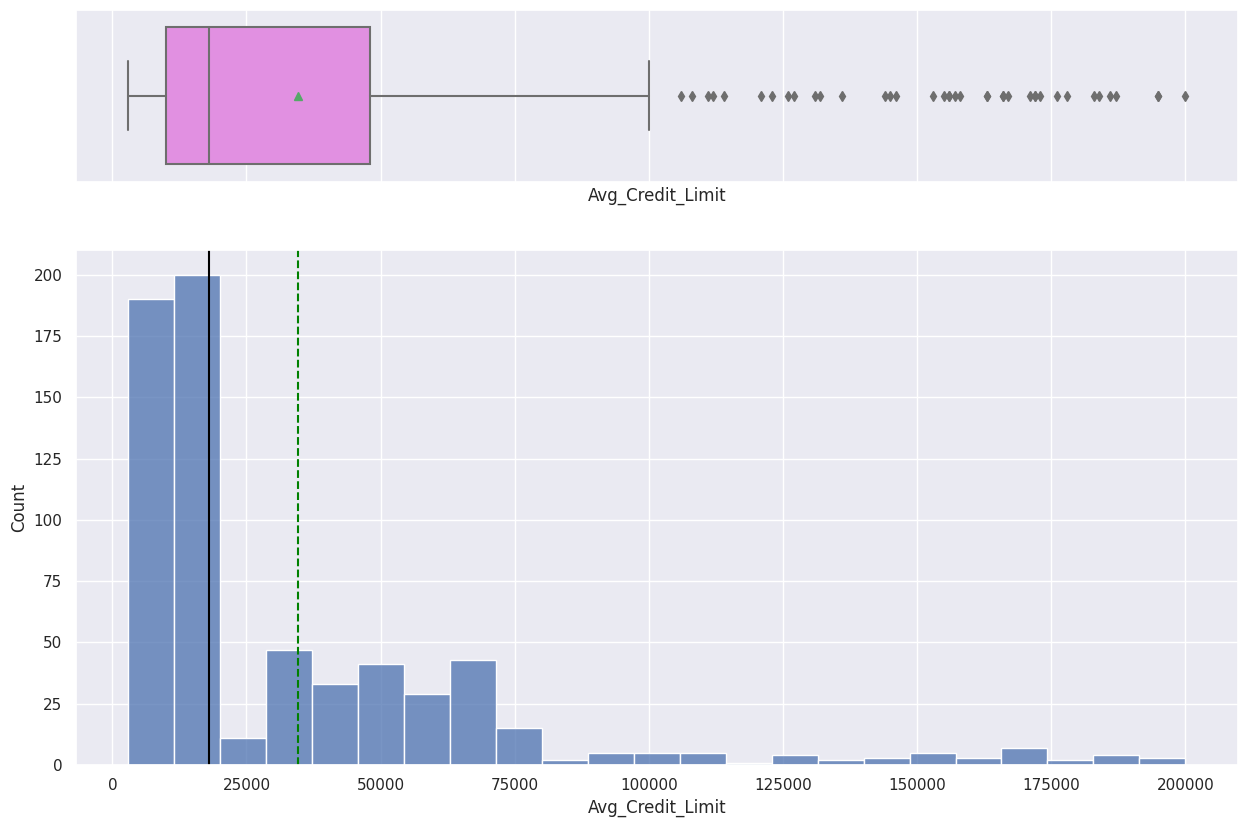

In [249]:
histogram_boxplot(data,'Avg_Credit_Limit')

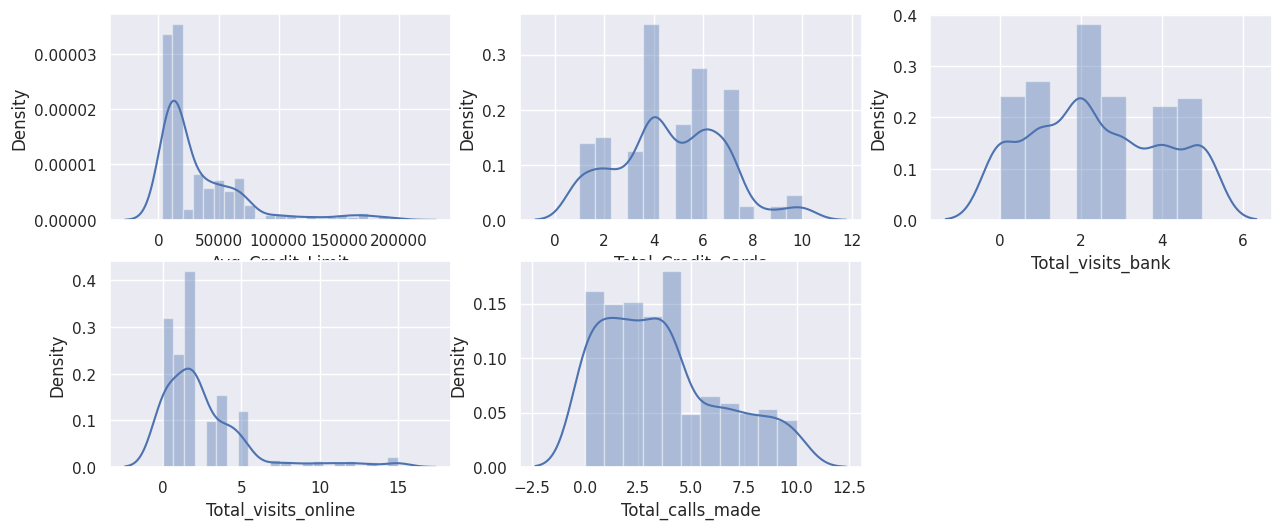

In [250]:
#-----------------------------Plot Distribution------------------------------------
plt.figure(figsize=(15,6))
pos = 1
for i in numerical_cols:
    plt.subplot(2, 3, pos)
    sns.distplot(df[i],kde=True)
    pos += 1

###   Bivariate EDA  Data Analysis

####  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Correlation Plot </span>

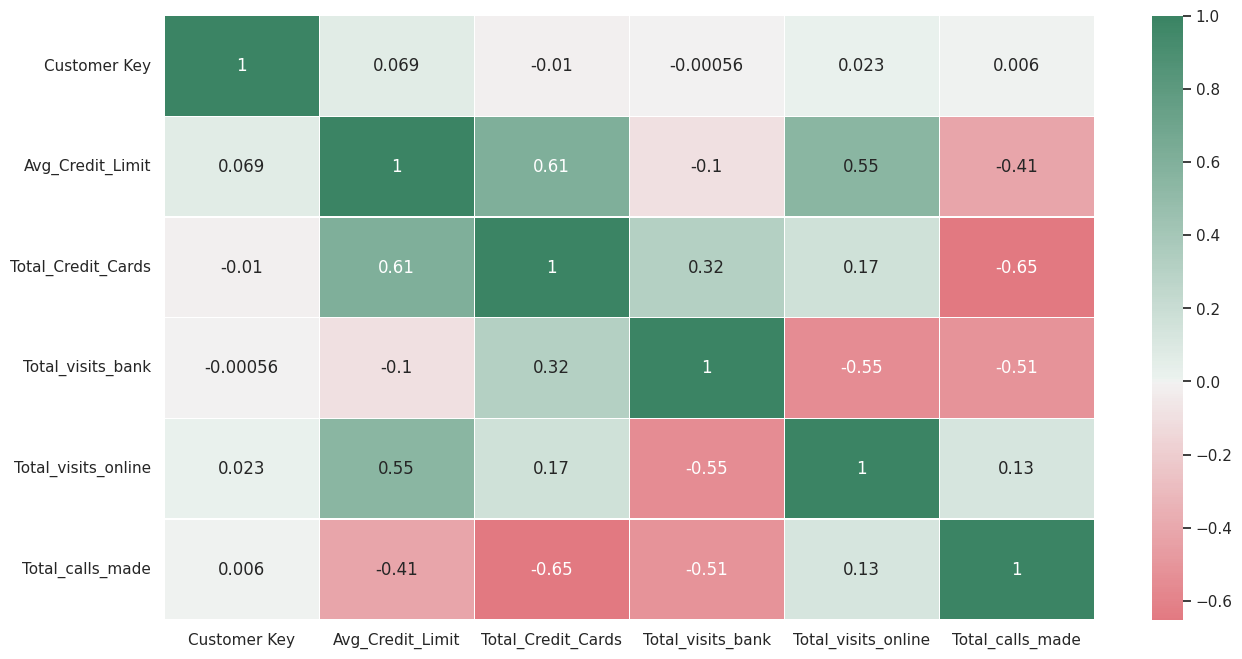

In [251]:
plt.figure(figsize=(15,8))

cmap=sns.diverging_palette(10, 150, as_cmap=True)

ax=sns.heatmap(data=df.corr(),
            annot=True,
            linewidths=.1,
            center=0,
            cbar=True,
            cmap=cmap
            )
plt.show()

###  EDA Summary 
- `Total_Credit_Cards` is varying from 1 years to 10 with 75% customer having 6 cards. 
- `Total_visits_online` is more than `Total_visits_bank`. This means there are more online usage for bank than in person banking. 
- `Average Credit Limit` seems to be right skewed. Based on amx value there may be outlier.
- `Customer Key` has duplicate values for 5 customers. Which means there are 5 customers whose data is repeated in dataset. This may represent customer profile changes. We will retain this data for clusttering.
- `Avegrage Credit Limit` has high corrleation with `Total Creadit Cards` and `Total Visit Online`. 
- There are no missing values in data.
- There is no data duplication in dataset.

## Data preprocessing

In [252]:
# List of numerical columns
objectColumns = df.dtypes[df.dtypes != np.object]
# list of columns whose data type is notobject i.e. string
listOfobjectColumns = list(objectColumns.index)
print(listOfobjectColumns)

['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


In [253]:
df.duplicated().sum()

0

In [254]:
df['Customer Key'].duplicated().sum()

5

### Outlier Detection

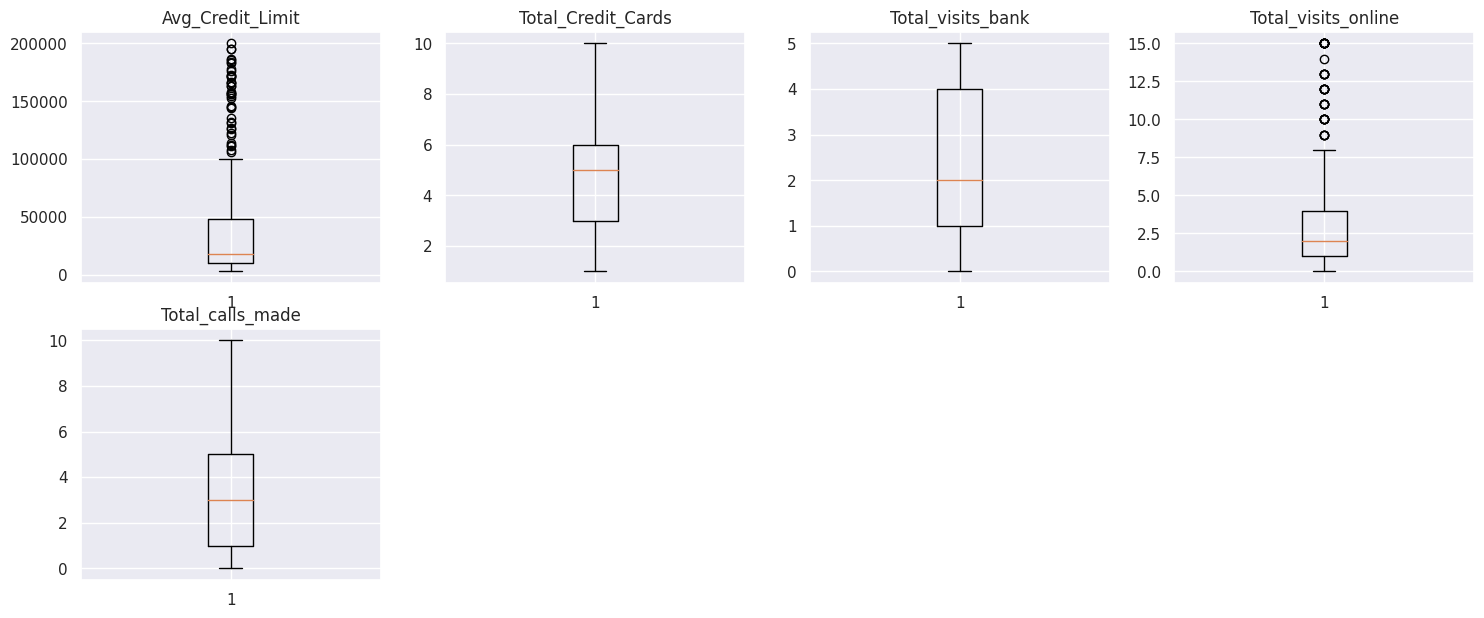

In [255]:
# outlier detection using boxplot
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

###  Data preprocessing Summary 
- There are no missing values in data. No missing value treatment is needed. 
- There are no duplicate in data. 
- `Customer Key` has duplicate values for 5 customers. Which means there are 5 customers whose data is repeated in dataset. This may represent customer profile changes. We will retain this data for clusttering.
- `Average Credit Limit` has many outliers. 

###**Treating outliers**

Performing log transformation to Avg_Credit_Limit. We will decide later of clustering needs to be done based on outlier treated data. 

In [256]:
data_no_outliers = df.copy()

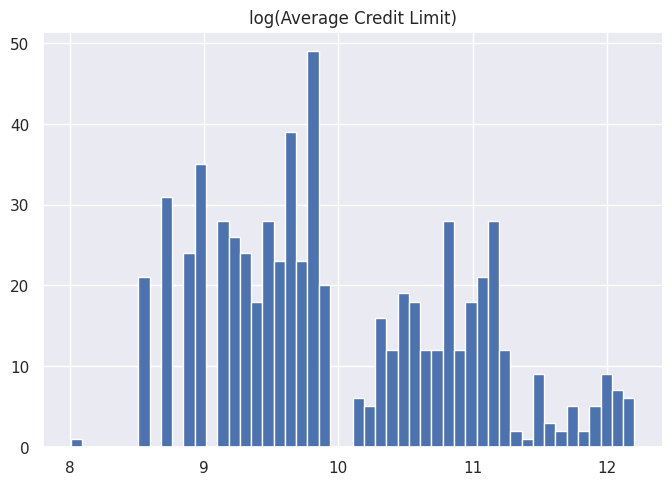

In [257]:
# Checking log transformation for Credit_Limit. 
plt.hist(np.log(data_no_outliers['Avg_Credit_Limit'] ), 50)
plt.title('log(Average Credit Limit)')
plt.show()

In [258]:
# reapplying the log transform to the Credit_Limit column.
data_no_outliers["Avg_Credit_Limit_log"] = np.log(data_no_outliers['Avg_Credit_Limit'])
# dropping the redundant columns
data_no_outliers.drop(columns=["Avg_Credit_Limit"], inplace=True)

In [259]:
data_no_outliers.head()

,Customer Key,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_log
0,87073,2,1,1,0,11.512925
1,38414,3,0,10,9,10.819778
2,17341,7,1,3,4,10.819778
3,40496,5,1,1,4,10.308953
4,47437,6,0,12,3,11.512925


In [260]:
# saving the dataset with all outliers treated in seperate file. This will allow further processing with this data.
data_no_outliers.to_csv('/content/drive/My Drive/Python Learning/Projects/Project6/Credit_Card_Customer_Data_noOutliers.csv.xlsx',index=False)


## Clustering

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Analzying Data </span>

**Step 1:** Check if clustering variables are highly correlated. If variables are highly correlated then one can drop one of the variables. If the variables are statistically correlated but the magnitude of the correlation is not high then each variable is likely to exert some effect on the final cluster. There are multiple theories around this. For this example, let's retain the highly correlated variables since we have fewer dimensions. In a different scenario, we can do dimension reduction to remove highly correlated variables.

**Step 2:**  Standardize all analytical/clustering variables before running the K-Means model. Since K-Means uses Euclidean distance to assign values to their cluster it is important to ensure all variables belong to a similar scale. Let’s take a look at the example below:

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Data Standardization </span>


In [261]:
corr_cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

#### Z Score Standardization

Compute the z score of each value in the sample, relative to the sample mean and standard deviation.

$z=\dfrac{x-\mu }{\sigma }$

In [262]:
##Scale the data
from scipy.stats import zscore

mydata_z = df[corr_cols].apply(zscore)

mydata_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


#### StandardScaler

In [263]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_sk_std=df[corr_cols].copy()

data_sk_std[corr_cols]=scaler.fit_transform(data_sk_std[corr_cols])

data_sk_std.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> K Means Clustering </span>

#### Create Cluster

1. n_clusters - int, default=8
The number of clusters to form as well as the number of centroids to generate.


2. n_init- int, default=10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.


3. max_iter- int, default=300
Maximum number of iterations of the k-means algorithm for a single run.


4. random_state - int, RandomState instance, default=None
Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. 


In [264]:
# List to store cluster and intra cluster distance

clusters = []
inertia_vals = [] #Variance - Intra cluster sum of distance ; within cluster sum of distance

# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 20, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(mydata_z)

    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

####  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Finding Optimal Number of Clusters </span>

In [265]:
print(inertia_vals) #---Intra cluster distance

[3300.000000000001, 2040.9898164784945, 933.0437490000536, 780.7736895551766, 704.4759188657507, 642.1490713311521, 600.0486684856997, 564.7034825889484, 539.6166797851888, 511.3540147357803, 490.21015216992294, 468.0926869132169, 446.0168909289058, 429.6850168212106, 414.3992022746661, 395.93313994770267, 382.87078738125393, 372.7825142622026, 349.9980301573428]


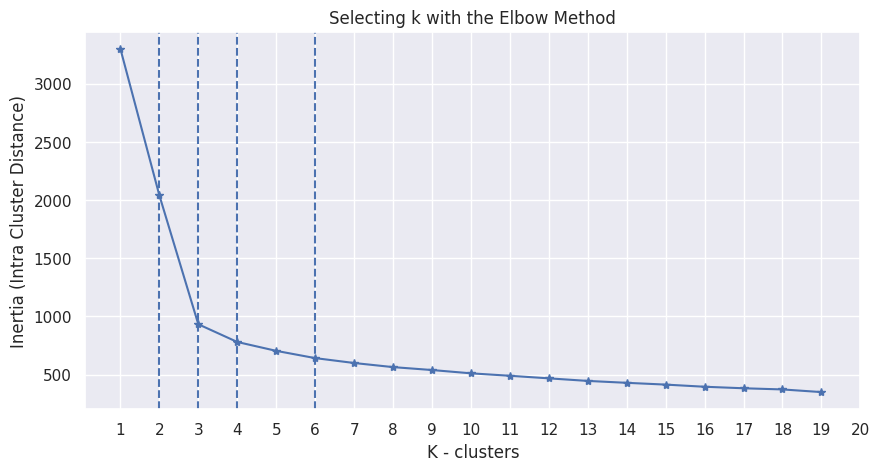

In [266]:
# plot the inertia vs K values

# from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(10,5))
plt.plot(range(1,20,1),inertia_vals,marker='*')
plt.title("Selecting k with the Elbow Method")
plt.axvline(2, linestyle="--")
plt.axvline(3, linestyle="--")
plt.axvline(4, linestyle="--")
plt.axvline(6, linestyle="--")
plt.xlabel("K - clusters")
plt.ylabel("Inertia (Intra Cluster Distance)")

plt.xticks(range(1,21,1))

plt.show()

From the graph above it seems there is an elbow between 3 and 6 with 3 being prominent value. This may give a  indication of a good value of K but this is not always be exact value. Hence in order to select a appropriate cluster we follow it up with a Silhouette Score as well.

####  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Silhouette Score </span>

$S\left( i\right) =\dfrac{b\left( i\right) -a\left( i\right) }{\max \left\{ a\left( i\right) ,b\left( i\right) \right\} }$

a= average intra-cluster distance i.e the average distance between each point within a cluster.


b= average inter-cluster distance i.e the average distance between all clusters.


1 indicates tight , well separated clusters, 0 indicates clusters not well separable and -1 indicates data points of a
cluster is more closer to centroid of other clusters than centroid of its own clusters

In [267]:
from sklearn.metrics import silhouette_score

silhouette=[]

for i in range(1,19,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(mydata_z, clusters[i].predict(mydata_z)))
    silhouette.append(round(silhouette_score(mydata_z, clusters[i].predict(mydata_z)),3))

---------------------------------------
KMeans(n_clusters=2, random_state=7)
Silhouette score: 0.41842496663215445
---------------------------------------
KMeans(n_clusters=3, random_state=7)
Silhouette score: 0.5157182558881063
---------------------------------------
KMeans(n_clusters=4, random_state=7)
Silhouette score: 0.3556670619372605
---------------------------------------
KMeans(n_clusters=5, random_state=7)
Silhouette score: 0.2717470361089752
---------------------------------------
KMeans(n_clusters=6, random_state=7)
Silhouette score: 0.25545029453623114
---------------------------------------
KMeans(n_clusters=7, random_state=7)
Silhouette score: 0.24847787091758058
---------------------------------------
KMeans(random_state=7)
Silhouette score: 0.22647301478125756
---------------------------------------
KMeans(n_clusters=9, random_state=7)
Silhouette score: 0.22394336692470437
---------------------------------------
KMeans(n_clusters=10, random_state=7)
Silhouette score: 0

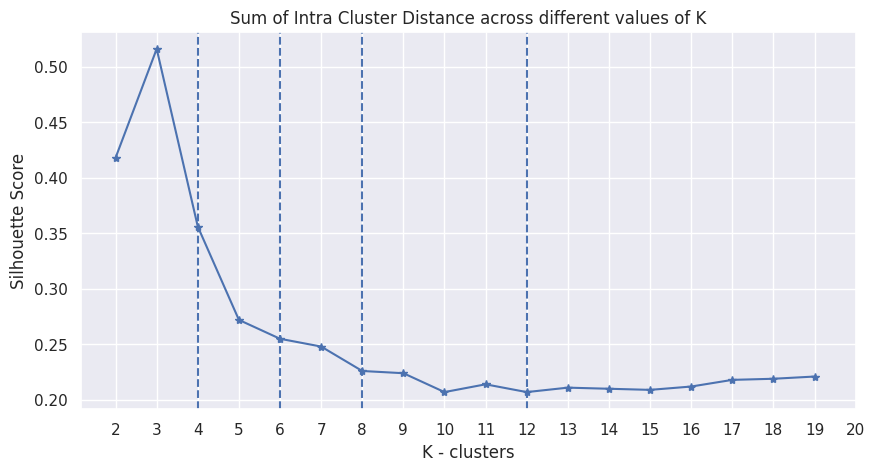

In [268]:
plt.figure(figsize=(10,5))
plt.plot(range(2,20,1),silhouette,marker='*')
plt.title("Sum of Intra Cluster Distance across different values of K")
plt.axvline(4, linestyle="--")
plt.axvline(6, linestyle="--")

plt.axvline(8, linestyle="--")
plt.axvline(12, linestyle="--")
plt.xlabel("K - clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2,21,1))
plt.show()

The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visually evaluating the density and separation between clusters.

- Based on silhouette_score and visulizer, K=3 seems to be right value of K which gives highest value for  silhouette_score. After 3 the silhouette_score is reducing. The elbow visulaizer also supports this. 
- We will proceed with further analysis with K=3 for cluster analysis.

####  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Silhouette Visualizer </span>

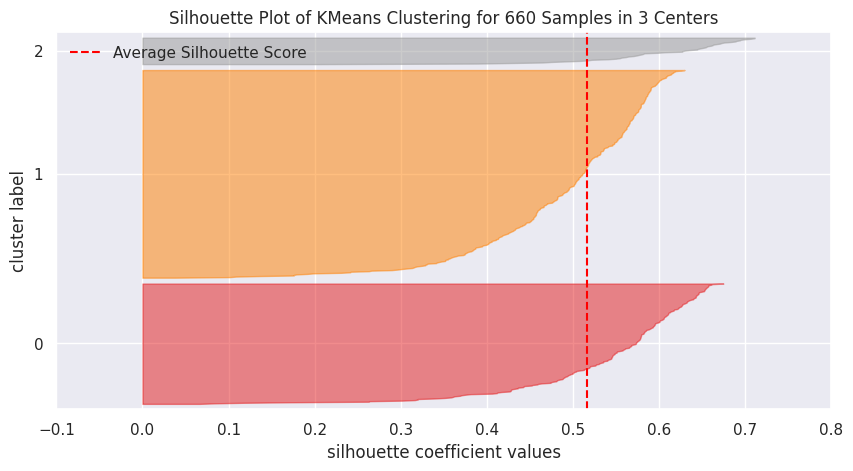

In [269]:
plt.figure(figsize=(10,5));
visualizer = SilhouetteVisualizer(KMeans(3, random_state=7));
visualizer.fit(mydata_z);
visualizer.show();

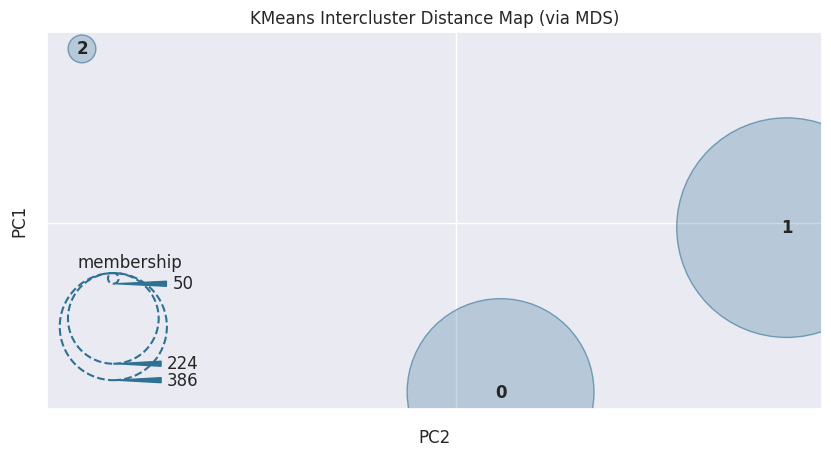

In [270]:
from yellowbrick.cluster import InterclusterDistance
plt.figure(figsize=(10,5));
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=7);
visualizer = InterclusterDistance(model, random_state=1);
visualizer.fit(mydata_z);# Fit the data to the visualizer
visualizer.show()   ;     # Finalize and render the figure

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

####  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Number of clusters in K Means </span>

In [271]:
## creating a new dataframe only for labels and converting it into categorical variable

kmeans = KMeans(n_clusters=3, random_state=7)
kmeans.fit(mydata_z)
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
# Joining the label dataframe with the data frame.
df_labeled = df.join(df_labels)
df_labeled['labels'].value_counts()

1    386
0    224
2     50
Name: labels, dtype: int64

 - Based on above data cluster 0 and 1 seems to be prominent clusters. 

####  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Studying Another clusters - K=2 </span>

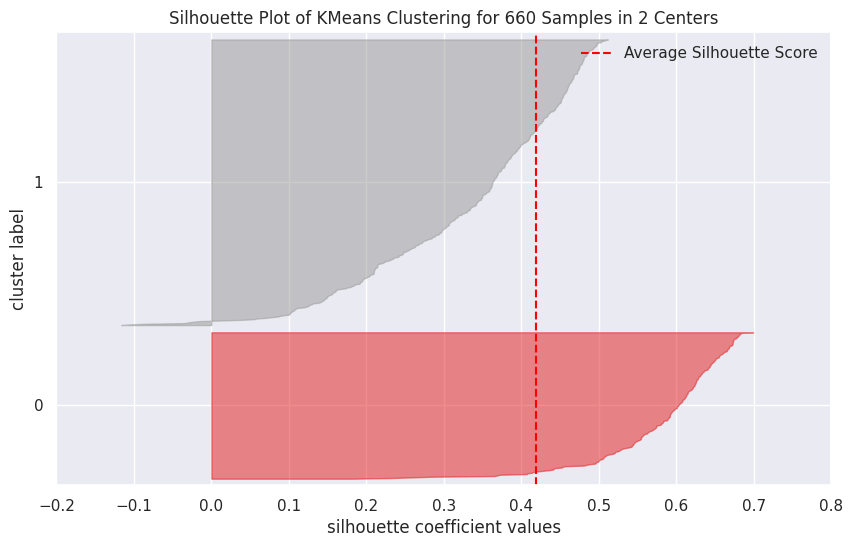

In [272]:
plt.figure(figsize=(10,6));

visualizer = SilhouetteVisualizer(KMeans(2, random_state=7))

visualizer.fit(mydata_z)

visualizer.show()

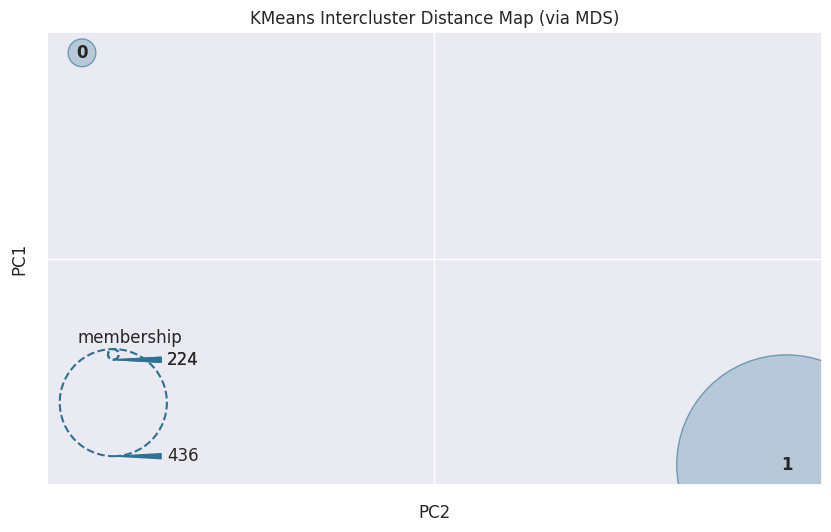

In [273]:
from yellowbrick.cluster import InterclusterDistance

plt.figure(figsize=(10,6));

# Instantiate the clustering model and visualizer
model = KMeans(2, random_state=7);

visualizer = InterclusterDistance(model, random_state=7);

visualizer.fit(mydata_z);# Fit the data to the visualizer

visualizer.show()   ;     # Finalize and render the figure

In [274]:
## creating a new dataframe only for labels and converting it into categorical variable

#Set the value of k=5
kmeans = KMeans(n_clusters=2, random_state=1)

kmeans.fit(mydata_z)

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

# Joining the label dataframe with the data frame.
df_labeled = df.join(df_labels)

df_labeled['labels'].value_counts()

0    436
1    224
Name: labels, dtype: int64

####  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Final Cluster Summary - K Means </span>

In [275]:
## creating a new dataframe only for labels and converting it into categorical variable

kmeans = KMeans(n_clusters=3, random_state=7)

kmeans.fit(mydata_z)

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

# Joining the label dataframe with the data frame.
df_labeled = df.join(df_labels)

df_labeled['labels'].value_counts()

1    386
0    224
2     50
Name: labels, dtype: int64

In [276]:
df_labeled.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,87073,100000,2,1,1,0,1
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,1
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,2


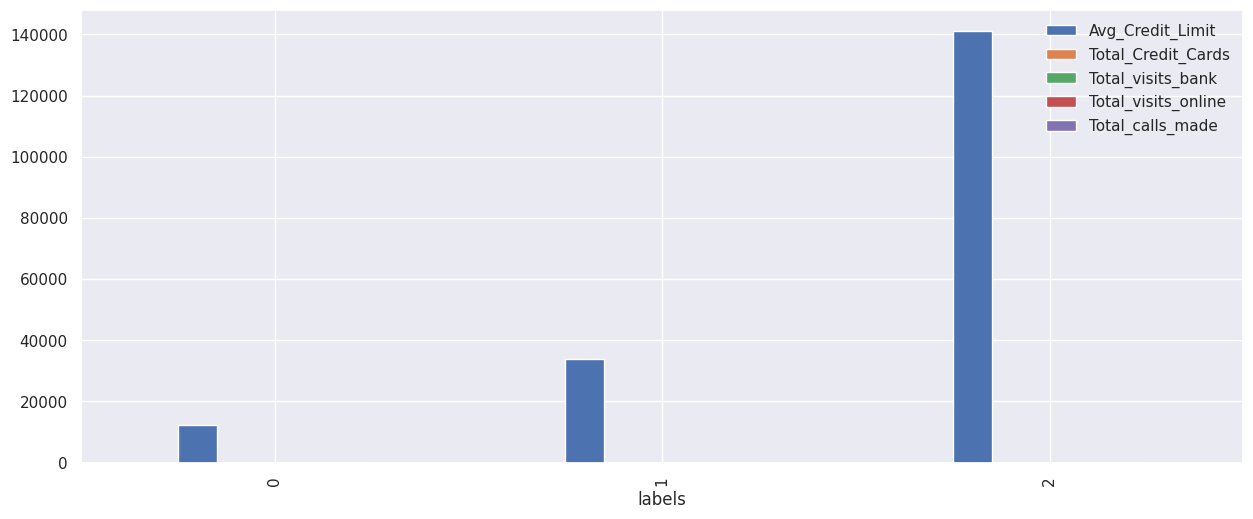

In [277]:
df_labeled[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', "labels"]].groupby("labels").mean().plot.bar(figsize=(15, 6));

In [278]:
"""
We consider - Avg_Credit_Limit ,Total_Credit_Cards and Total_visits_online as outcome
"""

def cluster_map(val):
    
    if val==2:
        return "High Credit Customer"
    elif val==1:
        return "Medium Credit Customer"
    elif val==0:
        return "Low Credit Customers"
    else:
        return "Other Customers"

In [279]:
df_labeled['Group']=df_labeled['labels'].apply(cluster_map)

pd.set_option('display.max_colwidth', None)

df_labeled.groupby("Group").mean().round(2).reset_index().sort_values(by=["Avg_Credit_Limit"], ascending=False)

,Group,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
2,High Credit Customer,56708.76,141040.00,8.74,0.60,10.90,1.08
1,Medium Credit Customer,54881.33,33782.38,5.52,3.49,0.98,2.00
0,Low Credit Customers,55239.83,12174.11,2.41,0.93,3.55,6.87


##### <b>Insights</b>

- **Cluster 2**:
    - Average Credit limit is High.
    - Total Number of credit cards owned by customers in this cluster are more compared to other clusters. .
    - These customers prefer online banking compared to in person visits.
    - These customers make less calls to customer service and their bank visits are less.


- **Cluster 1**:
     - Average Credit limit is Medium.
    - Total Number of credit cards owned by customers in this cluster are more than cluser 0 customers .
    - These customers use less online banking compared to other 2 groups.
    - These customers make more calls to customer service compare to Cluser 1.

- **Cluster 0**:
     - Average Credit limit is low compared to other groups.
    - Total Number of credit cards owned by customers in this cluster are less. 
    - These customers use more online banking compared to group 2.
    - These customers make more calls to customer service compared to other 2 groups.

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Hierarchical Clustering </span>


<b> Linkages </b>

1. Complete Linkage - Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities
2. Single Linkage - Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time
3. Average Linkage - Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities
4. Centroid Linkage - Dissimilarity between the centroid for cluster A (a mean vector of length p) and the centroid for cluster B. Centroid linkage can result in undesirable inversions.


#### Identifying Distance Metric and Linkage that works best



In [280]:
# mydata_z.head()
subset_scaled_df=mydata_z.copy()

subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [281]:
# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

####  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Cophenetic Coefficient </span>

 - What is Cophenetic correlation? 

  The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points. 

  The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

  Cophenetic correlation is the way to compare two or more dendrograms. 

In [282]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock",]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted",]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    
    print("-"*50)
    
    for lm in linkage_methods:
        
        #-------------------Default is Euclidean Distance for Linkage
        
        Z = linkage(subset_scaled_df, metric=dm, method=lm) #where we calulcate the dendrogram using the linkage
        
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, round(c,3)
            )
        )
        
#         print(coph_dists)
        
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

--------------------------------------------------
Cophenetic correlation for Euclidean distance and single linkage is 0.739.
Cophenetic correlation for Euclidean distance and complete linkage is 0.86.
Cophenetic correlation for Euclidean distance and average linkage is 0.898.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.886.
--------------------------------------------------
Cophenetic correlation for Chebyshev distance and single linkage is 0.738.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.853.
Cophenetic correlation for Chebyshev distance and average linkage is 0.897.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.891.
--------------------------------------------------
Cophenetic correlation for Mahalanobis distance and single linkage is 0.706.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.666.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.833.
Coph

In [283]:
print(high_dm_lm)

['euclidean', 'average']


 - euclidean distance metrics with 'average' linkage seems to be best combination for high Cophenetic correlation in Hierarchical Clustering.

**Exploring all linkage methods supported by Euclidean distance only.**

In [284]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [ ]:
print(high_dm_lm)

['euclidean', 'average']


 - euclidean distance metrics with 'average' linkage still seems to be best.

####  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Dendrogram </span>

**Let's see the dendrograms for the different linkage methods.**

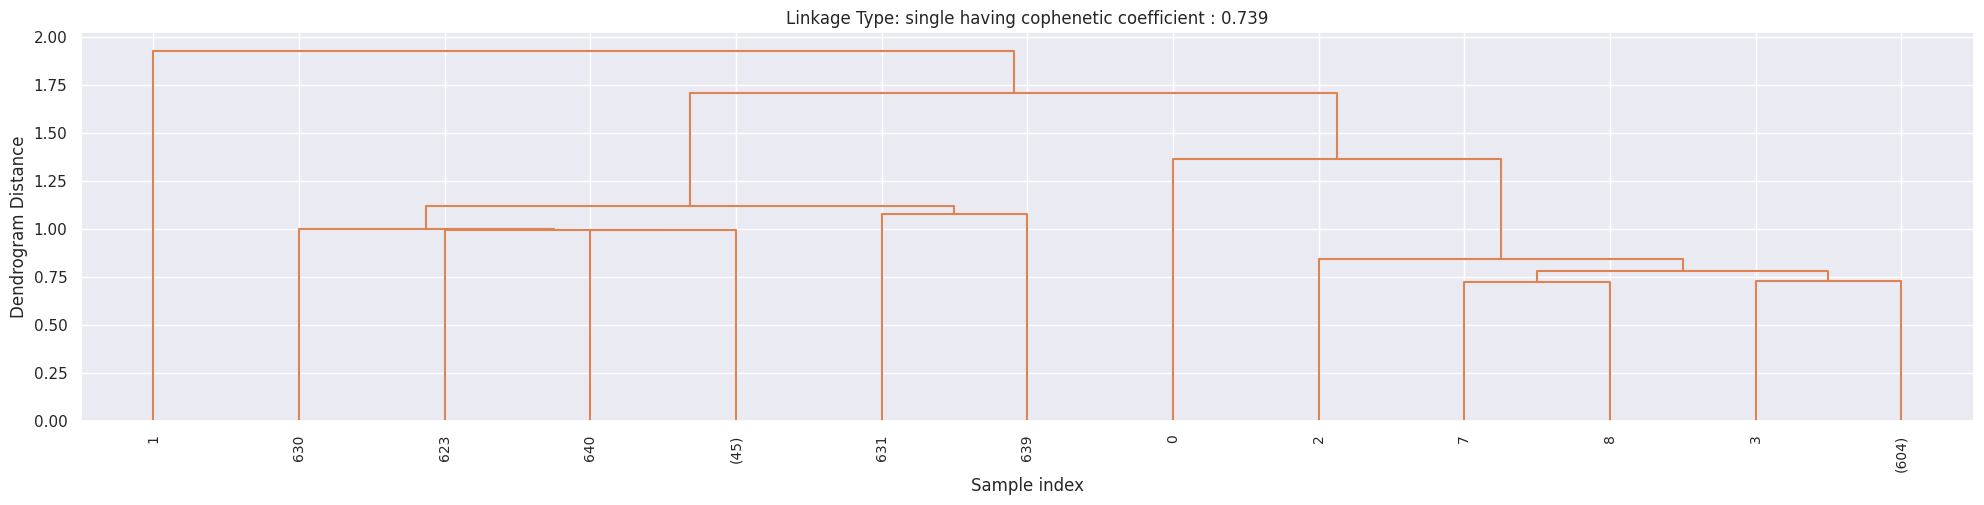

single 0.7391220243806552


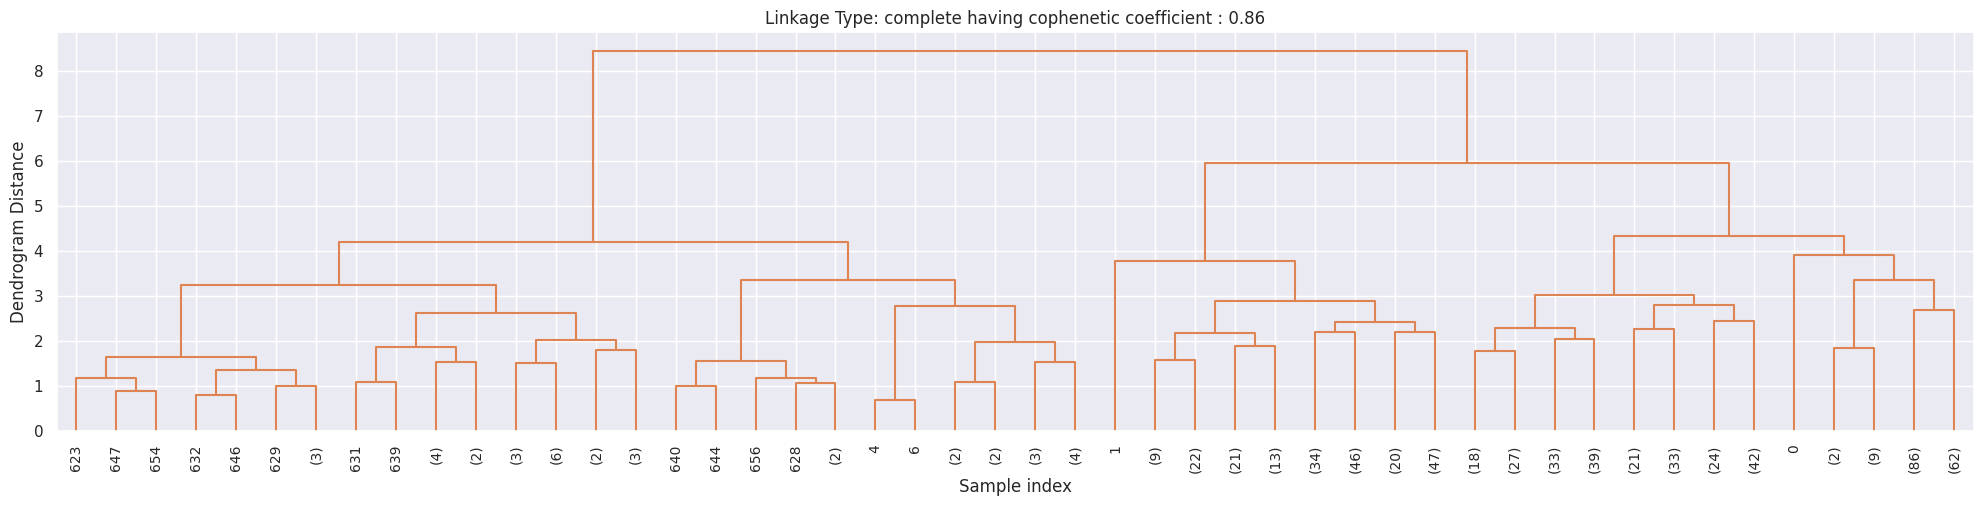

complete 0.8599730607972423


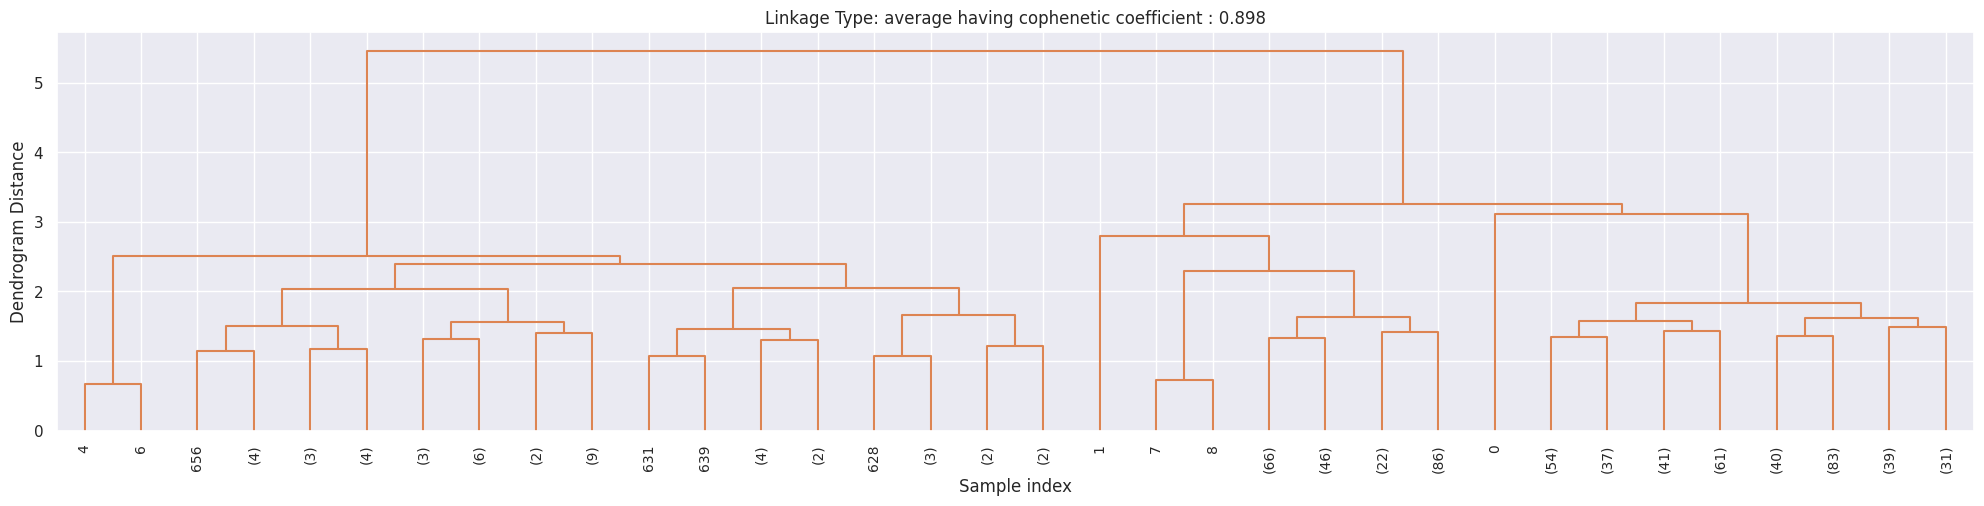

average 0.8977080867389372


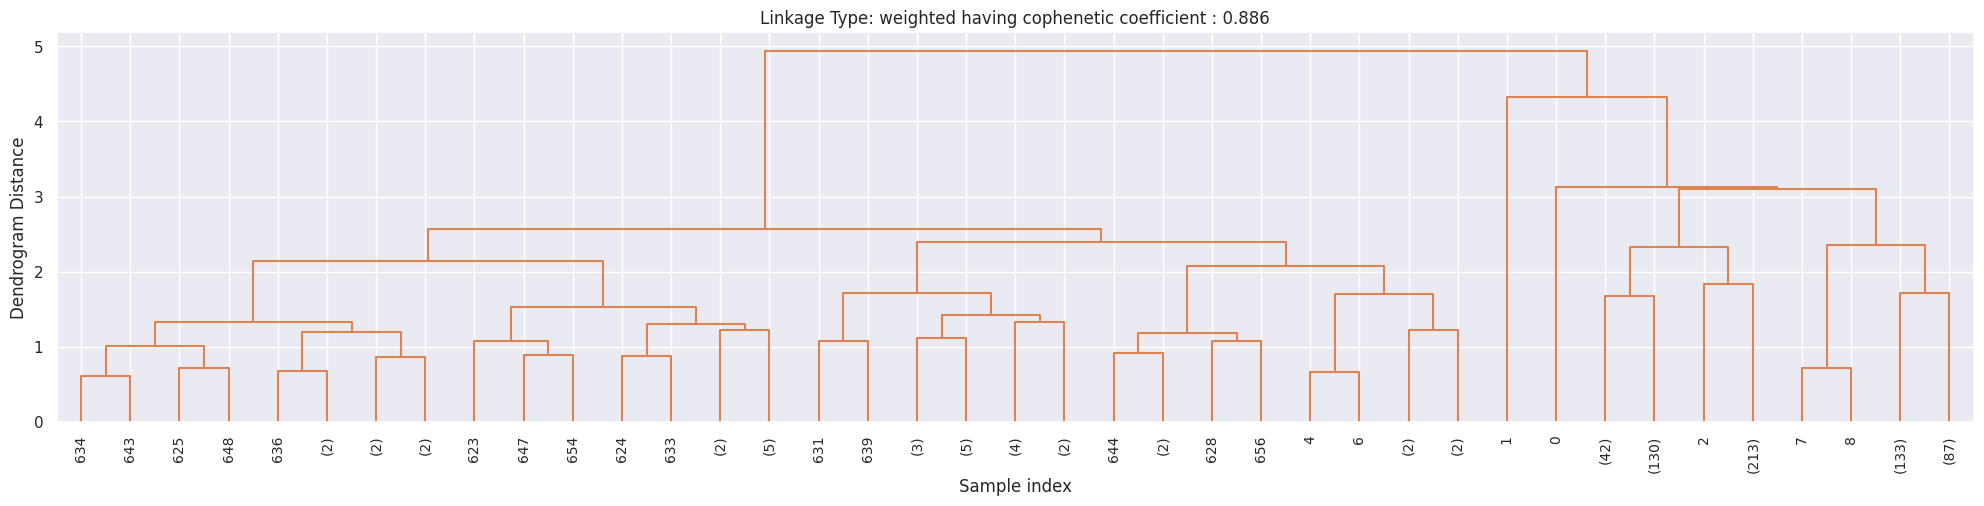

weighted 0.8861746814895477


In [285]:
linkage_methods=['single','complete','average','weighted']

results_cophenetic_coef=[]

for i in linkage_methods:
    
    plt.figure(figsize=(20, 5))
    
    plt.xlabel('Sample index')
    plt.ylabel('Dendrogram Distance')
    
#      Z = linkage(subset_scaled_df, metric='chebyshev', method=lm)
    
    Z = linkage(subset_scaled_df, i) #-------------------Default is Euclidean
    
    cc,cophn_dist=cophenet(Z,pdist(subset_scaled_df))
    
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level',color_threshold=60)
    
    #Z - is the linkage matrix
    #leaf_rotation - Angle of leaf labels. Check how data is displayed in the x axis in the image below
    #p - No more than p levels of the dendrogram tree are displayed. 
    #A “level” includes all nodes with p merges from the last merge.
    
    
    plt.tight_layout()
    
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [ ]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.739122
1,complete,0.859973
2,average,0.897708
3,weighted,0.886175


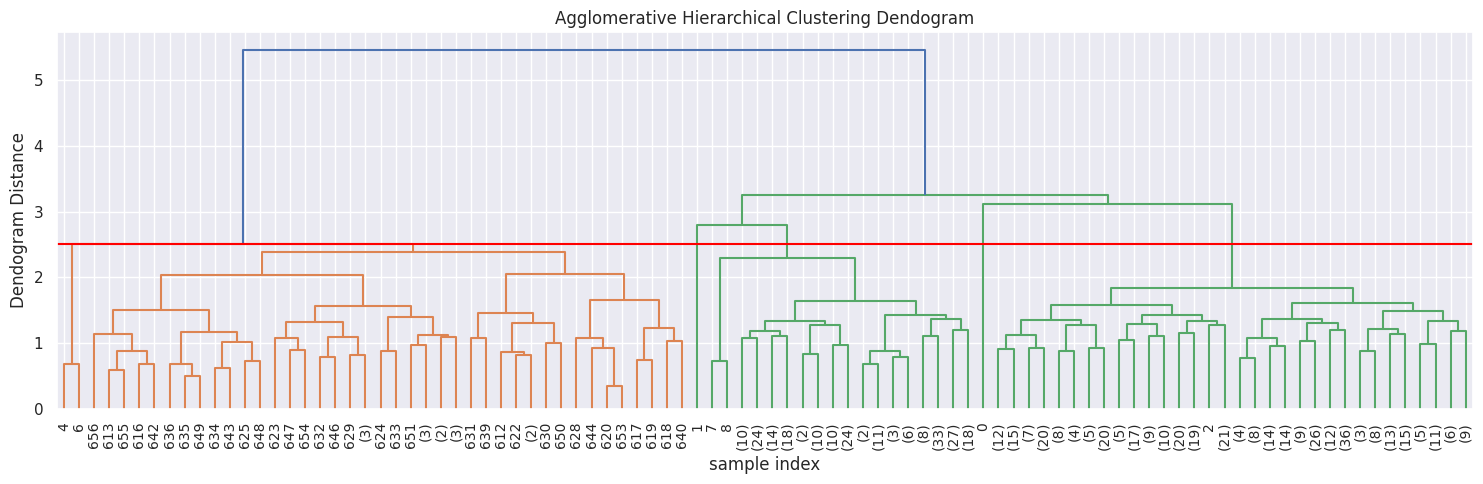

In [286]:
#--------------We have identified the linkage and distance metric as euclidean and average

#---------------Create dendrogram using the linkage(scaled data, distance metric, linkage method)

Z = linkage(subset_scaled_df, metric='euclidean', method='average')

plt.figure(figsize=(15, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Dendogram Distance')

dendrogram(Z,leaf_rotation=90.0, p=7, leaf_font_size=10, truncate_mode='level', color_threshold=3.5)

#----Z: dendrogram, leaf_rotation=formation of the leaves, X axis labels
#---p: How many levels for clustering from the top do you want to see
#---: color threshold: at what dendrogram distance do you want to cut the tree

plt.axhline(y=2.5,color='red')

plt.tight_layout()

 - The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where dendrogram height is maximum as it generally corresponds to distinct and homogeneous clusters.


**Observations**

- The cophenetic correlation is highest for average and weighted linkage methods.
- We will move ahead with average linkage.
- 2 or 3 appears to be the appropriate number of clusters from the dendrogram for Centroid linkage.

####  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Silhouette Score for Hierarchical Clustering </span>

In [287]:
df_cop=subset_scaled_df.copy()

df_cop.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [288]:
sil_score=[]

for i in range(2,15):
    
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean',  linkage='average')
    model.fit(subset_scaled_df)
    df_cop['labels'] = model.labels_
    print("-"*50)
    sc=round(silhouette_score(subset_scaled_df, df_cop['labels']),3)
    sil_score.append(sc)
    print("Silhouette Score for K=",i,":",round(silhouette_score(subset_scaled_df, df_cop['labels']),3))

--------------------------------------------------
Silhouette Score for K= 2 : 0.57
--------------------------------------------------
Silhouette Score for K= 3 : 0.516
--------------------------------------------------
Silhouette Score for K= 4 : 0.475
--------------------------------------------------
Silhouette Score for K= 5 : 0.44
--------------------------------------------------
Silhouette Score for K= 6 : 0.415
--------------------------------------------------
Silhouette Score for K= 7 : 0.418
--------------------------------------------------
Silhouette Score for K= 8 : 0.343
--------------------------------------------------
Silhouette Score for K= 9 : 0.342
--------------------------------------------------
Silhouette Score for K= 10 : 0.346
--------------------------------------------------
Silhouette Score for K= 11 : 0.245
--------------------------------------------------
Silhouette Score for K= 12 : 0.244
--------------------------------------------------
Silhouette Sc

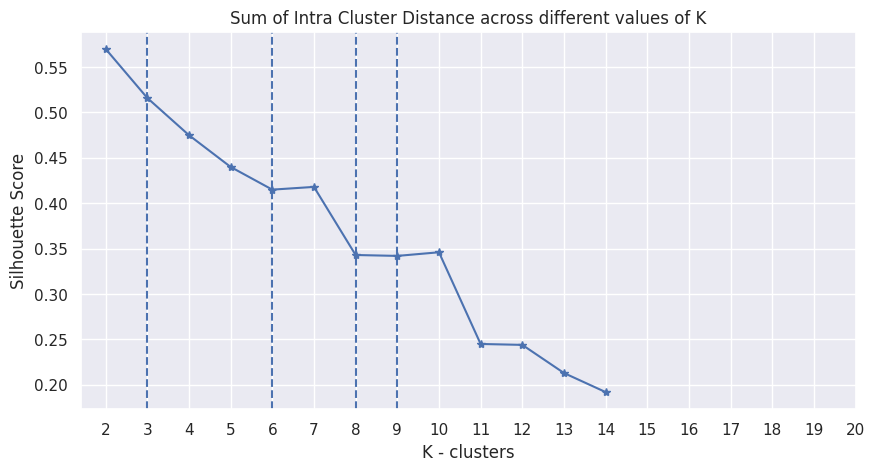

In [289]:
plt.figure(figsize=(10,5))
plt.plot(range(2,15,1),sil_score,marker='*')
plt.title("Sum of Intra Cluster Distance across different values of K")
plt.axvline(3, linestyle="--")
plt.axvline(6, linestyle="--")

plt.axvline(8, linestyle="--")
plt.axvline(9, linestyle="--")
plt.xlabel("K - clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2,21,1))
plt.show()

**Observations**

- Based on AgglomerativeClustering, Silhouette Score for K= 2 is 0.57. 
- K =3 also has decent score. 

#### Davies Bouldin Score

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of between to within cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

In [290]:
#--------------------Davies Bouldin score for hierarchical models-------------------------

from sklearn.metrics import davies_bouldin_score

def get_Hmeans_score(
    data, distance, link, center
):  #--------------------- We can specify linkage and distance
    """
    returns the  score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        distance - the distance for AgglomerativeClustering
        link - the linkage method for AgglomerativeClustering
        center - the number of clusters you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the Hierarchical model fit to the data
    """
    #---------------instantiate Hierarchical Clustering
    
    hmeans = AgglomerativeClustering(n_clusters=center, affinity=distance, linkage=link)
    
    #---------------Then fit the model to the data using the fit method
    model = hmeans.fit_predict(data)

    #---------------Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)

    return score

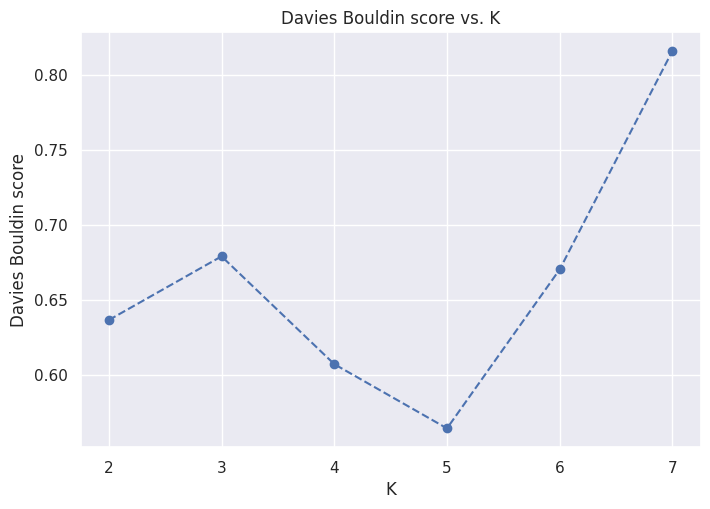

In [291]:
centers = list(range(2, 8)) #These are number of clusters
avg_scores = []

for center in centers:
    avg_scores.append(get_Hmeans_score(subset_scaled_df, "euclidean", "average", center))

plt.plot(centers, avg_scores, linestyle="--", marker="o", color="b");
plt.xlabel("K");
plt.ylabel("Davies Bouldin score");
plt.title("Davies Bouldin score vs. K");

**Observations**

- Based on comparision between K and Davies Bouldin score, seems K=3 is good cluster value. We will proceed with K=3 for further analysis. 

In [292]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(subset_scaled_df)

df_labeled['HC labels'] = model.labels_

df_labeled.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels,Group,HC labels
0,87073,100000,2,1,1,0,1,Medium Credit Customer,0
1,38414,50000,3,0,10,9,0,Low Credit Customers,2
2,17341,50000,7,1,3,4,1,Medium Credit Customer,0
3,40496,30000,5,1,1,4,1,Medium Credit Customer,0
4,47437,100000,6,0,12,3,2,High Credit Customer,1


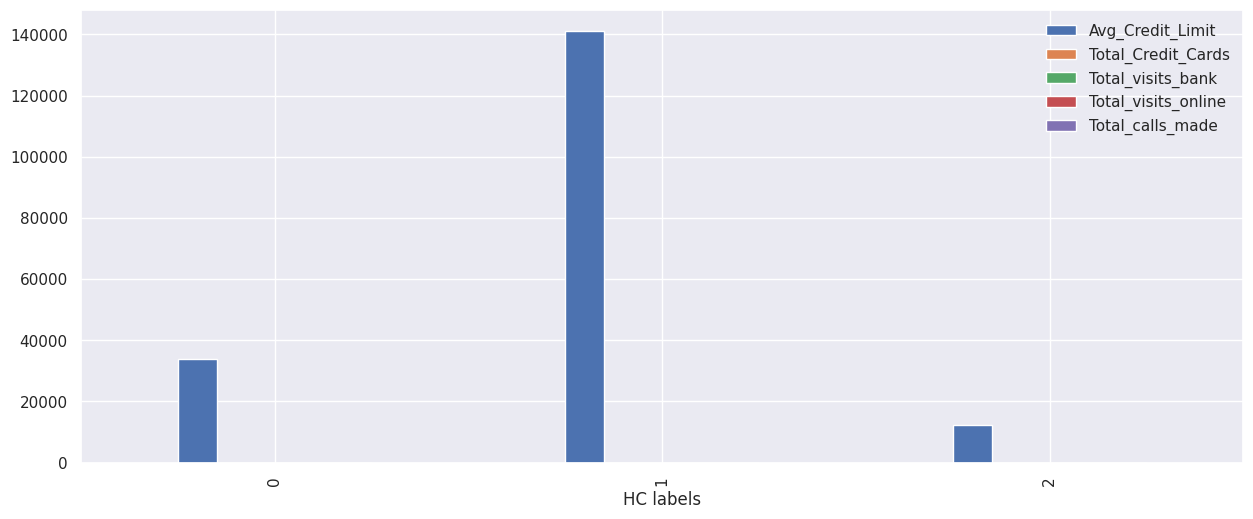

In [293]:
df_labeled[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',"HC labels"]].groupby("HC labels").mean().plot.bar(figsize=(15, 6));

In [294]:
"""
We consider - Avg_Credit_Limit ,Total_Credit_Cards and Total_visits_online as outcome
"""

def cluster_map_HC(val):
    
    if val==1:
        return "High Credit Customer"
    elif val==0:
        return "Medium Credit Customer"
    elif val==2:
        return "Low Credit Customers"
    else:
        return "Other Customers"

In [295]:
df_labeled['Group HC']=df_labeled['HC labels'].apply(cluster_map_HC)

pd.set_option('display.max_colwidth', None)

df_labeled.groupby("Group HC").mean().round(2).reset_index().sort_values(by=["Avg_Credit_Limit"], ascending=False)

,Group HC,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC labels
0,High Credit Customer,56708.76,141040.00,8.74,0.60,10.90,1.08,1.0
2,Medium Credit Customer,54925.97,33713.18,5.51,3.49,0.98,2.01,0.0
1,Low Credit Customers,55163.97,12197.31,2.40,0.93,3.56,6.88,2.0


##### <b>Insights</b>

- **Cluster 1**:
    - Average Credit limit is High.
    - Total Number of credit cards owned by customers in this cluster are more compared to other clusters. .
    - These customers prefer online banking compared to in person visits.
    - These customers make less calls to customer service and their bank visits are less.


- **Cluster 0**:
     - Average Credit limit is Medium.
    - Total Number of credit cards owned by customers in this cluster are more than cluser 0 customers .
    - These customers use less online banking compared to other 2 groups.
    - These customers make more calls to customer service compare to Cluser 1.

- **Cluster 2**:
     - Average Credit limit is low compared to other groups.
    - Total Number of credit cards owned by customers in this cluster are less. 
    - These customers use more online banking compared to group 2.
    - These customers make more calls to customer service compared to other 2 groups.

In [296]:
pd.crosstab(df_labeled['Group HC'], df_labeled['Group'])

Group,Low Credit Customers,Medium Credit Customer,High Credit Customer
Group HC,,,
High Credit Customer,0,0,50
Low Credit Customers,223,0,0
Medium Credit Customer,1,386,0



#### Compare K-means clusters with Hierarchical clusters
 - K-means clustering algorithm took less time to execute compared to Hierarchical clustering. 
 - Both clustering techinques gave similar cluster structure with 3 clusters.
 - Silhouette scores for 3 clusters is pretty much same for both clustering technique
     - Kmeans : 0.515
     - Hirerachical Cluster: 0.516
 - Most of the observations are similar in  clusters for both algorithms.
 - Number of appropriate clusters from each algoritghm
     - Kmeans - 3
     - Hirerarchical clustering - 2 or 3 both gave good results.

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> PCA

In [297]:
mydata_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [298]:
from sklearn.decomposition import PCA

pca=PCA(n_components=5, random_state=7) #How many dimension = Total number of columns

principalComponents = pca.fit_transform(mydata_z)

variance=pca.explained_variance_ratio_

print("Variance explained by each component")

j=1
for i in variance:
    print("PC",j,":",round(i*100,2))
    j+=1


Variance explained by each component
PC 1 : 45.74
PC 2 : 37.43
PC 3 : 6.4
PC 4 : 5.56
PC 5 : 4.88


PC1+PC2 would capture 82% variance or information of all the 5 columns together from the data

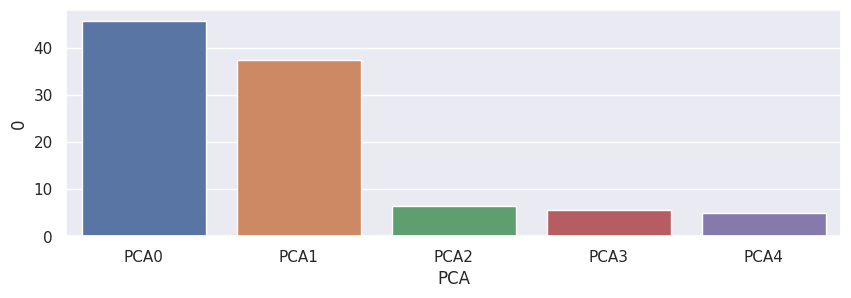

In [299]:
data_var = pd.DataFrame(variance).reset_index()
data_var[0]=round(data_var[0]*100,2)
# data['PCA']='PCA'+(data['index']+1)

data_var.head()

data_var['PCA']='PCA'+(data_var['index'].astype(str))

data_var.head()

plt.figure(figsize=(10,3));

sns.barplot(x=data_var['PCA'],y=data_var[0]);

In [300]:
pca=PCA(n_components=3, random_state=7)

principalComponents = pca.fit_transform(mydata_z)

pca_std = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])

In [301]:
pca_std

,pc1,pc2,pc3
0,0.501291,0.524829,1.895862
1,-1.459560,3.105588,-0.906802
2,0.525795,0.823979,0.089030
3,-0.362294,0.128123,0.558215
4,1.266228,3.668708,-0.099999
...,...,...,...
655,3.038539,2.666249,-0.092289
656,2.567247,3.341750,-0.873793
657,2.851444,2.983081,0.044888
658,4.178258,4.582930,-0.605336


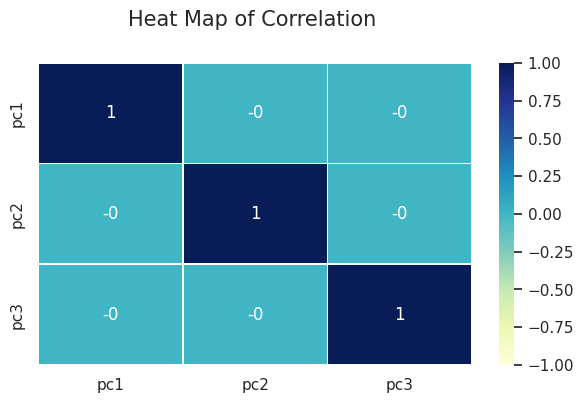

In [302]:
coor_chd_data = pca_std.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(7, 4)

#--------------------------------------Plotting a heat map of different variables---------------------------------
plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(coor_chd_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

In [303]:
model = KMeans(n_clusters=3, random_state=7)

model.fit(mydata_z)

pca_std['labels'] = model.labels_

pca_std

,pc1,pc2,pc3,labels
0,0.501291,0.524829,1.895862,1
1,-1.459560,3.105588,-0.906802,0
2,0.525795,0.823979,0.089030,1
3,-0.362294,0.128123,0.558215,1
4,1.266228,3.668708,-0.099999,2
...,...,...,...,...
655,3.038539,2.666249,-0.092289,2
656,2.567247,3.341750,-0.873793,2
657,2.851444,2.983081,0.044888,2
658,4.178258,4.582930,-0.605336,2


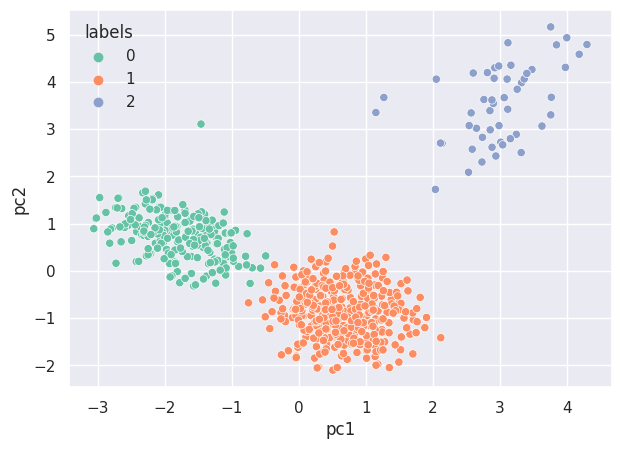

In [304]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_std.pc1, y=pca_std.pc2, hue=pca_std.labels, palette="Set2")

In [305]:
copy_data=mydata_z.copy() #-----Original data

copy_data['labels'] = model.labels_ #----K Means labels to the original data

copy_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


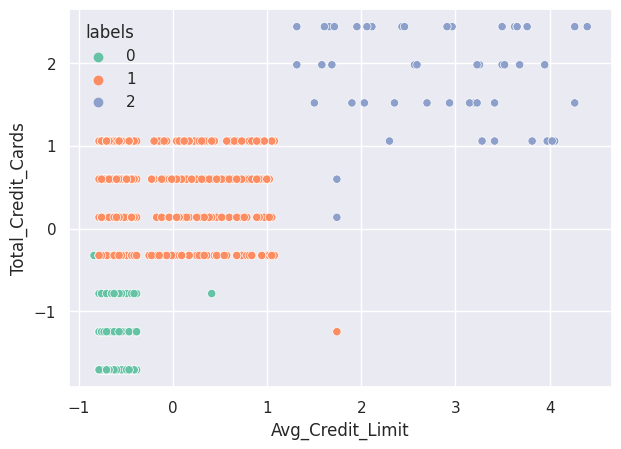

In [306]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=copy_data.Avg_Credit_Limit, y=copy_data.Total_Credit_Cards, hue=copy_data.labels, palette="Set2")

##### <b>Observations</b>
Since number of columns are already vary small, this PCA is not used for any decision making. 
- First 2 validables after PCA would capture 82% features.

## Business recommendations and insights

- Customers with higher Average Creadit limits have more numbers of cards. These customers prefer using online banking. Bank can consider special features in bank site to keep these customers engage and do not loose them. 
- Customers in Medium Credit limit cluster are high in number. This can be focused group as these customer make calls to customer service. Helping these customers by moving them to High Credit customer may help boosting customer satisfaction.
- It seems Cluster with Low credit tend to make more calls to banks customer service. Reason may be asking for credit limit increase or not satisfied with services provided by bank. More ficus can be given to this group to understand root cause. 
